# Motivation

In order to predict an Italian city’s air quality, I chose the air quality dataset that was sourced from the UCI Machine Learning Repository. This dataset was based on instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#  Loading the data

In [2]:
sf = pd.read_csv('AirQualityUCI.csv')

In [3]:
sf.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
sf.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [6]:
sf.shape

(9471, 17)

# Basic statistics

In [7]:
sf.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.6000,1.5000,2.6000,11.900
PT08.S1(CO),9357.0,1048.990061,329.832710,-200.0,921.0000,1053.0000,1221.0000,2040.000
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.0000,-200.0000,-200.0000,1189.000
C6H6(GT),9357.0,1.865683,41.380206,-200.0,4.0000,7.9000,13.6000,63.700
PT08.S2(NMHC),9357.0,894.595276,342.333252,-200.0,711.0000,895.0000,1105.0000,2214.000
NOx(GT),9357.0,168.616971,257.433866,-200.0,50.0000,141.0000,284.0000,1479.000
PT08.S3(NOx),9357.0,794.990168,321.993552,-200.0,637.0000,794.0000,960.0000,2683.000
NO2(GT),9357.0,58.148873,126.940455,-200.0,53.0000,96.0000,133.0000,340.000
PT08.S4(NO2),9357.0,1391.479641,467.210125,-200.0,1185.0000,1446.0000,1662.0000,2775.000
PT08.S5(O3),9357.0,975.072032,456.938184,-200.0,700.0000,942.0000,1255.0000,2523.000


The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

# Data Cleaning

In [8]:
#drop rows with -200 values
sf = pd.read_csv('AirQualityUCI.csv',na_values=-200)

In [9]:
#drop rows with NaaN
sf.drop(sf.columns[[15,16]], axis=1, inplace=True)

In [10]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [11]:
#drop end rows with NaN values
sf.dropna(how='all',inplace=True)
#drop RH NAN rows
sf.dropna(thresh=10,axis=0,inplace=True)

In [12]:
sf.shape

(8991, 15)

In [13]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 15 columns):
Date             8991 non-null object
Time             8991 non-null object
CO(GT)           7344 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         887 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7396 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7393 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [14]:
#Split hour from time into new column
sf['Hour']=sf['Time'].apply(lambda x: int(x.split(':')[0]))
sf.Hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Hour, dtype: int64

In [15]:
# How many missing values now?
print('Count of missing values:\n',sf.shape[0]-sf.count())

Count of missing values:
 Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Hour                0
dtype: int64


Fill missing value strategy:

-CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour

-NHHC_GT will be dropped as it has 90% missing data

In [16]:
#Format date column
sf['Date']=pd.to_datetime(sf.Date, format='%d/%m/%Y')  

In [17]:
# set the index as date
sf.set_index('Date',inplace=True)

In [18]:
#Create month column
sf['Month']=sf.index.month    
sf.reset_index(inplace=True)

In [19]:
# Drop column NMHC_GT; it has 90% missing data
sf.drop('NMHC(GT)',axis=1,inplace=True)    

In [20]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 16 columns):
Date             8991 non-null datetime64[ns]
Time             8991 non-null object
CO(GT)           7344 non-null float64
PT08.S1(CO)      8991 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7396 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7393 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
Hour             8991 non-null int64
Month            8991 non-null int64
dtypes: datetime64[ns](1), float64(12), int64(2), object(1)
memory usage: 1.1+ MB


In [21]:
# Fill NaN values with monthly average of particular hour
sf['CO(GT)']=sf['CO(GT)'].fillna(sf.groupby(['Month','Hour'])['CO(GT)'].transform('mean'))
sf['NOx(GT)']=sf['NOx(GT)'].fillna(sf.groupby(['Month','Hour'])['NOx(GT)'].transform('mean'))
sf['NO2(GT)']=sf['NO2(GT)'].fillna(sf.groupby(['Month','Hour'])['NO2(GT)'].transform('mean'))

In [22]:
print('Left out missing value:',sf.shape[0]-sf.count() )

Left out missing value: Date               0
Time               0
CO(GT)            30
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)          261
PT08.S3(NOx)       0
NO2(GT)          261
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
Hour               0
Month              0
dtype: int64


In [23]:
# Fill left out NaaN values with hourly average value
sf['CO(GT)']=sf['CO(GT)'].fillna(sf.groupby(['Hour'])['CO(GT)'].transform('mean'))
sf['NOx(GT)']=sf['NOx(GT)'].fillna(sf.groupby(['Hour'])['NOx(GT)'].transform('mean'))
sf['NO2(GT)']=sf['NO2(GT)'].fillna(sf.groupby(['Hour'])['NO2(GT)'].transform('mean'))

In [24]:
print('Left out missing value:',sf.shape[0]-sf.count() )

Left out missing value: Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Hour             0
Month            0
dtype: int64


In [25]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 16 columns):
Date             8991 non-null datetime64[ns]
Time             8991 non-null object
CO(GT)           8991 non-null float64
PT08.S1(CO)      8991 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          8991 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          8991 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
Hour             8991 non-null int64
Month            8991 non-null int64
dtypes: datetime64[ns](1), float64(12), int64(2), object(1)
memory usage: 1.1+ MB


In [26]:
sf.drop(sf.columns[[0,1]], axis=1, inplace=True)

I now use the describe() method to show the summary statistics of the numeric variables

In [27]:
sf.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),8991.0,2.087529,1.378000,0.1000,1.043505,1.8000,2.8000,11.900
PT08.S1(CO),8991.0,1099.833166,217.080037,647.0000,937.000000,1063.0000,1231.0000,2040.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.400000,8.2000,14.0000,63.700
PT08.S2(NMHC),8991.0,939.153376,266.831429,383.0000,734.500000,909.0000,1116.0000,2214.000
NOx(GT),8991.0,235.628247,196.900245,2.0000,100.307692,170.0000,319.0000,1479.000
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0000,658.000000,806.0000,969.5000,2683.000
NO2(GT),8991.0,108.192116,45.495667,2.0000,73.554244,104.0000,134.0000,333.000
PT08.S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.000000,1463.0000,1674.0000,2775.000
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0000,731.500000,963.0000,1273.5000,2523.000
T,8991.0,18.317829,8.832116,-1.9000,11.800000,17.8000,24.4000,44.600


#  Co-relation between variables

Understand co-relation between variables

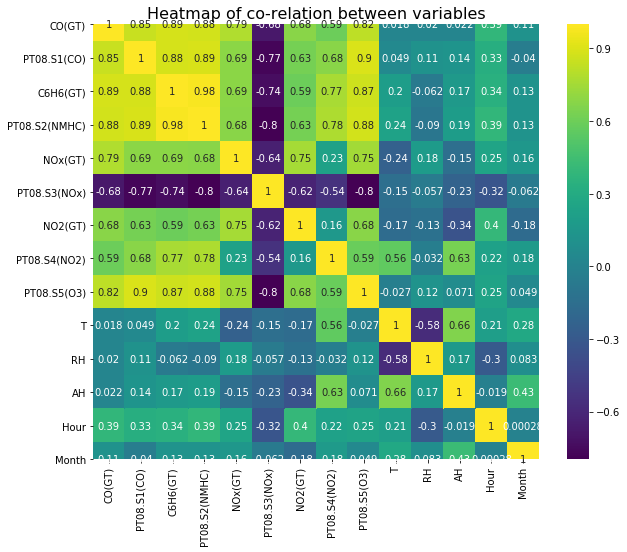

In [28]:
#Use heatmap to see corelation between variables
sns.heatmap(sf.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

# Influence of features on output-RH

Try to understand degree of linearity between RH output and other input features

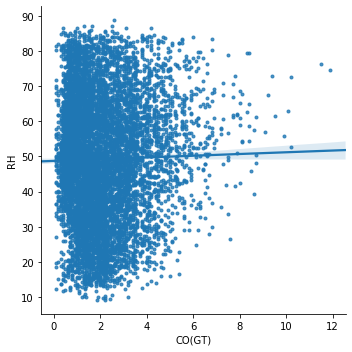

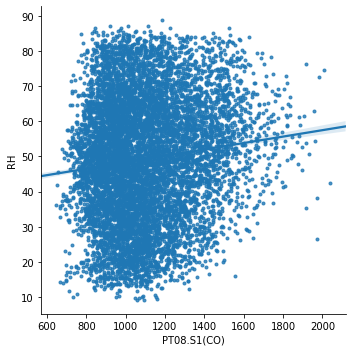

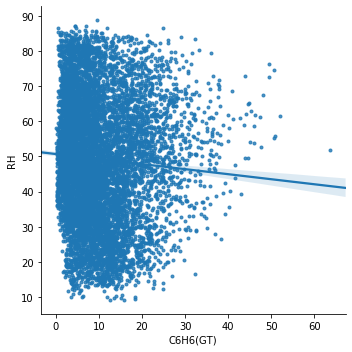

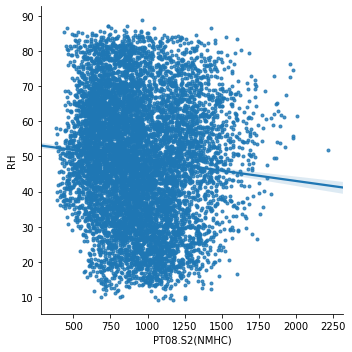

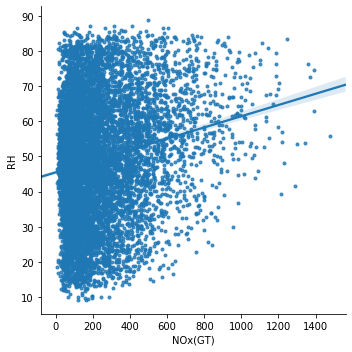

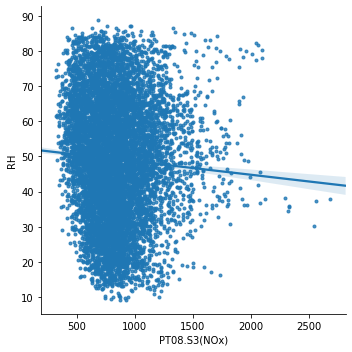

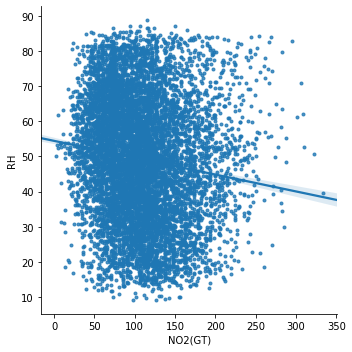

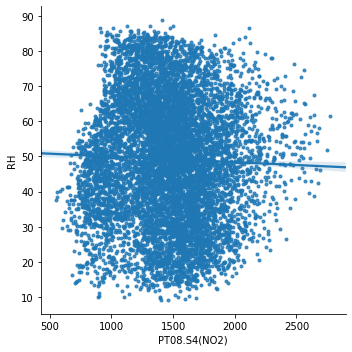

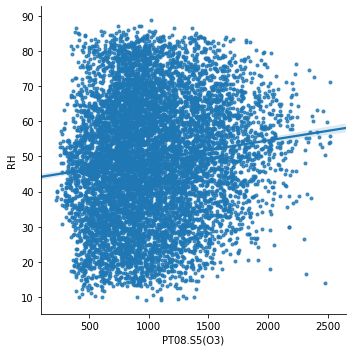

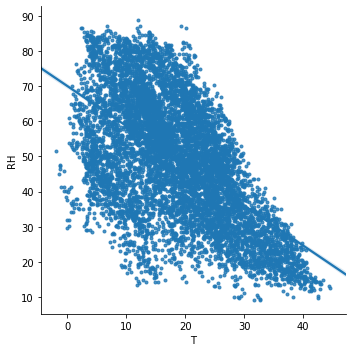

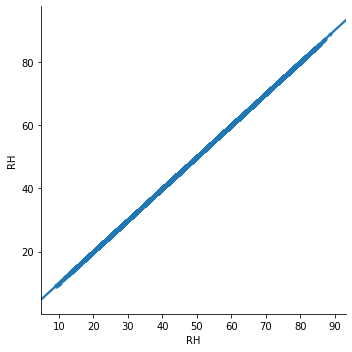

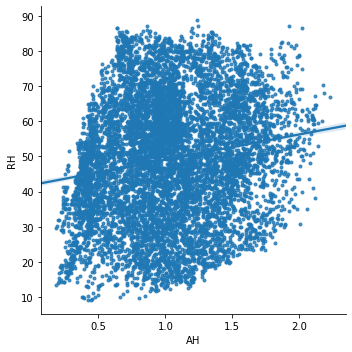

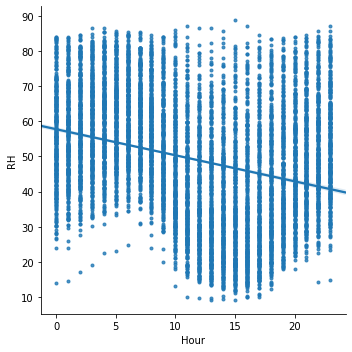

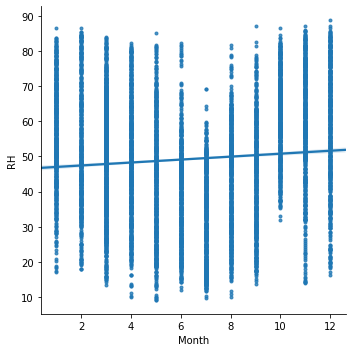

In [29]:
#plot all X-features against output variable RH
col_=sf.columns.tolist()
for i in sf.columns.tolist():
    sns.lmplot(x=i,y='RH',data=sf,markers='.')

# Baseline Linear Regression

In [30]:
# Define Feature (X) and Target (y)
#X-input features
X=sf.drop('RH',1)
#y-input features
y=sf['RH']

In [31]:
# Normalize Feature variable
 #initiatilise
ss=StandardScaler()
#apply stardardisation
X_std=ss.fit_transform(X)     

In [32]:
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6293, 13)
Test data size: (2698, 13)


## Train the model

In [33]:
lr=LinearRegression()
#fit the linear model on train data
lr_model=lr.fit(X_train,y_train)          

In [34]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 49.21763046095795
--------------------------------
Slope:


[('CO(GT)', -1.7367447259994806),
 ('PT08.S1(CO)', 3.4037741865264355),
 ('C6H6(GT)', -5.697492496373159),
 ('PT08.S2(NMHC)', -1.196234248325733),
 ('NOx(GT)', 3.503689967134083),
 ('PT08.S3(NOx)', -0.7001846893676611),
 ('NO2(GT)', -1.1080890551814233),
 ('PT08.S4(NO2)', 6.877135083115153),
 ('PT08.S5(O3)', -1.2881546341603776),
 ('T', -20.184910618985874),
 ('AH', 12.063387650671062),
 ('Hour', -0.6178414096506839),
 ('Month', 1.339928337474743)]

## Prediction

In [35]:
#predict using the model
y_pred=lr_model.predict(X_test)  
#calculate R squared
print("Baseline R squared of model:", "{:.2%}".format(lr_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))     
print('Baseline RMSE of model:',rmse)

Baseline R squared of model: 88.05%
Baseline RMSE of model: 6.01289437121927


## Conclusion of baseline linear regression model

This means that we can predict RH using all the features together with RMSE as 6.01. Let us call it as baseline model.

# Feature Engineering and testing model

Try with multiple feature combination and see if RMSE is improving

## Build RMSE function

Create dummy variables for two categorical variables.

In [36]:
# write function to measure R squared
def train_test_R2(feature):
    X=sf[feature]
    y=sf['RH']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    lr_model.score(X_test, y_test)
    return lr_model.score(X_test, y_test)
# write function to measure RMSE
def train_test_RMSE(feature):
    X=sf[feature]
    y=sf['RH']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [37]:
sf.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'Hour', 'Month'],
      dtype='object')

In [38]:
col=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH',
       'Hour', 'Month']

In [39]:
#print list of features
print('List of features:',col_)    

List of features: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Hour', 'Month']


In [40]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('-------------------------')
print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))
print('-------------------------')
print('RMSE with Features as',col_[1:5],train_test_RMSE(col_[1:5]))
print('-------------------------')
print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))
print('-------------------------')
print('RMSE with Features as',col_[1:12],train_test_RMSE(col_[1:12]))
print('-------------------------')

RMSE with Features as ['CO(GT)', 'PT08.S1(CO)'] 17.10722324985973
-------------------------
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)'] 14.787924479855858
-------------------------
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'] 12.875243451046265
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)'] 15.0638160825228
-------------------------
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH'] 1.7672145057359115e-14
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'] 2.2657439553274874e-14
-------------------------


## Conclusion of Feature Engineering and testing

After this experiment it looks that baseline model is performing best

# Decision Tree Regression

Let us try to apply Decision tree regression technique and see if any improvement happens

## Train the model

In [41]:
dt_one_reg=DecisionTreeRegressor()
#fit the Decision tree regression on train data
dt_model=dt_one_reg.fit(X_train,y_train)

## Prediction

In [42]:
#predict using the model
y_pred_dtone=dt_model.predict(X_test)
#calculate R squared
print("R squared of decision tree regression model:", "{:.2%}".format(dt_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_pred_dtone,y_test))    
print('RMSE of decision tree regression model:',rmse)

R squared of decision tree regression model: 99.37%
RMSE of decision tree regression model: 1.3770422531420279


## Conclusion of decision tree regression model

When decision tree regression has been applied we observe significant improvement of RMSE value to 1.34

# Random Forest Regression

Let us apply Random Forest regression and measure RMSE

## Train the model

In [43]:
rf_reg=RandomForestRegressor()
#fit the random forest regressor on train data
rf_model=rf_reg.fit(X_train,y_train)

## Prediction

In [44]:
#predict using the model
y_pred_rf=rf_model.predict(X_test)
#calculate R squared
print("R squared of random forest regressor model:", "{:.2%}".format(rf_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_pred_rf,y_test))    
print('RMSE of random forest regressor model:',rmse)

R squared of random forest regressor model: 99.84%
RMSE of random forest regressor model: 0.7043816192448691


## Conclusion of random forest regressor model

Applying Random Forest regression the predicted RMSE has improved to 0.70

# Gradient boosting

Let us apply Gradient Boosting regression and measure RMSE

## Train the model

In [45]:
gb_reg = GradientBoostingRegressor()
#fit the gradient boosting regressor on train data
gb_model=gb_reg.fit(X_train,y_train)

## Prediction

In [46]:
#predict using the model
y_pred_gb=gb_reg.predict(X_test)
#calculate R squared
print("R squared of gradient boosting regressor model:", "{:.2%}".format(gb_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_pred_gb,y_test))    
print('RMSE of gradient boosting regressor model:',rmse)

R squared of gradient boosting regressor model: 98.66%
RMSE of gradient boosting regressor model: 2.0119226544795787


## Conclusion of gradient boosting regressor model

The Random Forest algorithm and the baseling Linear Regression both giving better RMSE value than gradient boosting regression.

# Support Vector Machine

## Train the model

In [47]:
sv_reg=SVR()
#fit the support vector regressor on train data
sv_model=sv_reg.fit(X_train,y_train)

## Prediction

In [48]:
#predict using the model
y_pred_sv=sv_model.predict(X_test)
#calculate R squared
print("R squared of support vector regressor model:", "{:.2%}".format(sv_model.score(X_test, y_test)))
 #calculate rmse
rmse=np.sqrt(mean_squared_error(y_pred_sv,y_test))    
print('RMSE of support vector regressor model:',rmse)

R squared of support vector regressor model: 94.97%
RMSE of support vector regressor model: 3.9022790893220107


## Conclusion of support vector regressor model

The Random Forest algorithm and the baseling Linear Regression both giving better RMSE value than support vector regression.

# Final Conclusion

In [49]:
print('RMSE of Linear Regression model:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('RMSE of Decision Tree Regression model:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))
print('RMSE of Random Forest Regression model:',np.sqrt(mean_squared_error(y_pred_rf,y_test)))
print('RMSE of Gradient Boosting Regression model:',np.sqrt(mean_squared_error(y_pred_gb,y_test)))
print('RMSE of Support Vector Regression model:',np.sqrt(mean_squared_error(y_pred_sv,y_test)))

RMSE of Linear Regression model: 6.01289437121927
RMSE of Decision Tree Regression model: 1.3770422531420279
RMSE of Random Forest Regression model: 0.7043816192448691
RMSE of Gradient Boosting Regression model: 2.0119226544795787
RMSE of Support Vector Regression model: 3.9022790893220107


__Hence Random Forest algorithm is selected for the prediction of RH using the features__